In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Redundant: print available styles
# print(plt.style.available)

%matplotlib inline

In [4]:
tickers = ["SPY", "QQQ", "AAPL", "GLD", "TLT"]
start_date = "2015-01-01"
end_date = "2024-12-31"

In [7]:
raw_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
close_prices = raw_data["Adj Close"] 
close_prices.head()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GLD,QQQ,SPY,TLT
Date,,,,,
2015-01-02,24.288580,114.080002,95.016571,171.568024,97.243263
2015-01-05,23.604332,115.800003,93.622787,168.469589,98.770828
2015-01-06,23.606548,117.120003,92.367477,166.882751,100.550362
2015-01-07,23.937569,116.430000,93.558205,168.962311,100.351738
2015-01-08,24.857311,115.940002,95.348854,171.960587,99.022804


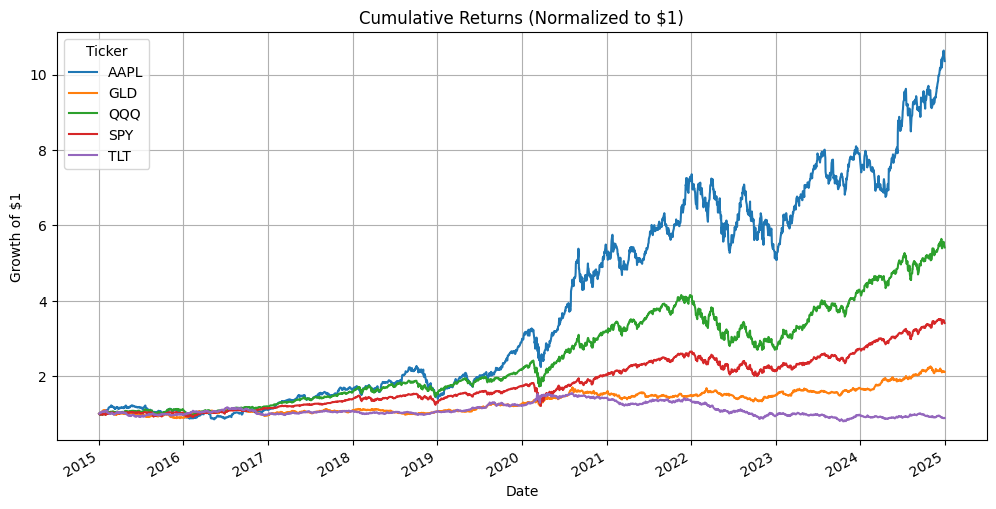

In [8]:
normed = close_prices / close_prices.iloc[0]  # normalize all series to start at 1
normed.plot(figsize=(12, 6), title="Cumulative Returns (Normalized to $1)")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.show()

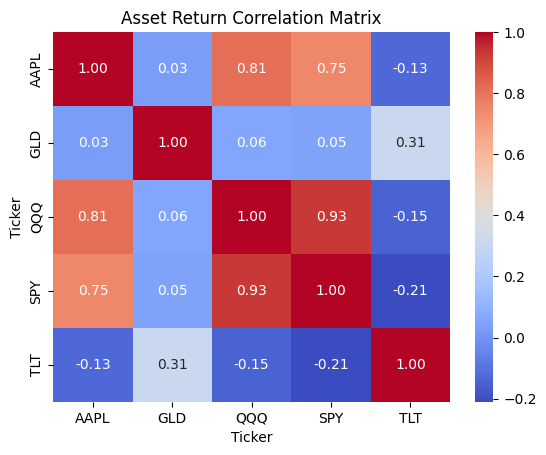

In [9]:
returns = close_prices.pct_change().dropna()

sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Asset Return Correlation Matrix")
plt.show()

In [10]:
close_prices.to_csv("../data/close_prices.csv")
returns.to_csv("../data/daily_returns.csv")